### The intention of this notebook is to do some feature engineering in order to experiment if it provide some more info for the dataset

#### Get started

In [1]:
## importing standard libraries
import pandas as pd
import numpy as np 
import warnings
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
import config as cfg 
import sweetviz as sv 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import joblib
warnings.filterwarnings("ignore")

C:\Users\asus\AppData\Local\Temp\ipykernel_31688\1577553200.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\asus\anaconda3\envs\obesity\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#let's define a feature description function

lst = [
    ("Gender", "Sex"),
    ("Age", "Age"),
    ("Height", "Height"),
    ("Weight", "Weight"),
    ("FHWO", "Overweight family members"),
    ("FAVC", "Consume high-calorie foods frequently"),
    ("FCVC", "Number of meals where you usually eat vegetables"),
    ("NCP", "Number of main meals a day"),
    ("CAEC", "Eat food between meals"),
    ("SMOKE", "How often you smoke"),
    ("CH2O", "Liters of water you drink a day"),
    ("SCC", "Monitor the calories you consume daily"),
    ("FAF", "Frequency of days per week that you often have physical activity"),
    ("TUE", "Time of use of technological devices on a daily basis"),
    ("CALC", "Frequency of alcohol intake"),
    ("MTRANS", "Means of transportation that you use regularly"),
    ("NObeyesdad", "Body mass index")
]
feature_description=dict(lst)

In [3]:
raw_df=pd.read_csv(cfg.raw_train_data)
raw_df.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
raw_df.drop(['id'],inplace=True,axis=1)

In [5]:
#Let's create a BMI column
def BMI(height,weight):
    return weight/height**2
raw_df['BMI']=raw_df.apply(lambda row: BMI(row['Height'],
                                           row['Weight']),
                                           axis=1)

raw_df.drop(['Weight','Height'],axis=1,inplace=True)
raw_df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,24.443011,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084
20754,Male,18.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278
20755,Male,20.101026,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841
20756,Male,33.852953,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,28.899693


In [6]:
#Transforming output
label=LabelEncoder()
raw_df['Target']=pd.DataFrame(label.fit_transform(raw_df['NObeyesdad']),columns=['Target'])
raw_df.drop('NObeyesdad',axis=1,inplace=True)
raw_df.head(4)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Target
0,Male,24.443011,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,28.259565,6
1,Female,18.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,23.422091,1
2,Female,18.000000,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,17.126706,0
3,Female,20.952737,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,44.855798,4


In [19]:
#Know the label mappings
mapping=dict(zip(label.transform(label.classes_),label.classes_))
mapping

{0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Obesity_Type_I',
 3: 'Obesity_Type_II',
 4: 'Obesity_Type_III',
 5: 'Overweight_Level_I',
 6: 'Overweight_Level_II'}

In [7]:
numerical_cols=list(raw_df.select_dtypes(include=['int64','float64']).columns.values)
raw_df[numerical_cols].corrwith(raw_df['Target'],method='pearson').sort_values(ascending=False)
#['BMI','Age','CH2O','FCVC']

BMI     0.463894
Age     0.283018
CH2O    0.187100
FCVC    0.041076
TUE    -0.076040
NCP    -0.091154
FAF    -0.096643
dtype: float64

In [8]:
report_bmi=sv.analyze(raw_df)
report_bmi.show_html('Obesity_dataset_report_fe.html',open_browser=True)

[Summarizing dataframe]                      |          | [  0%]   00:00 -> (? left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)


Report Obesity_dataset_report_fe.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
#Let's now encode the categorical columns
categorical_cols=list(raw_df.select_dtypes(include=['object']).columns.values)
categorical_cols
#mod_train_data=pd.get_dummies(raw_df,columns=categorical_cols,drop_first=True)
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first')
train_x=pd.DataFrame(encoder.fit_transform(raw_df[categorical_cols]))
train_x.columns=list(encoder.get_feature_names_out())
numerical_cols.append('Target')
mod_train_data=pd.concat([raw_df[numerical_cols],train_x],axis=1)


In [10]:
mod_train_data.head(5)

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Target,Gender_Male,family_history_with_overweight_yes,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,2.000000,2.983297,2.763573,0.000000,0.976473,28.259565,6,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,18.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.422091,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,18.000000,1.880534,1.411685,1.910378,0.866045,1.673584,17.126706,0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,20.952737,3.000000,3.000000,1.674061,1.467863,0.780199,44.855798,4,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,31.641081,2.679664,1.971472,1.979848,1.967973,0.931721,25.599151,6,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


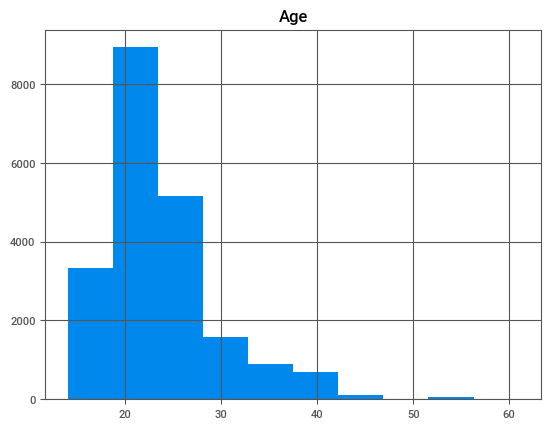

In [11]:
mod_train_data[['Age']].hist()
plt.show()

In [12]:
def log_disb(val):
    return np.log(val)
mod_train_data['log_age']=mod_train_data['Age'].apply(log_disb)

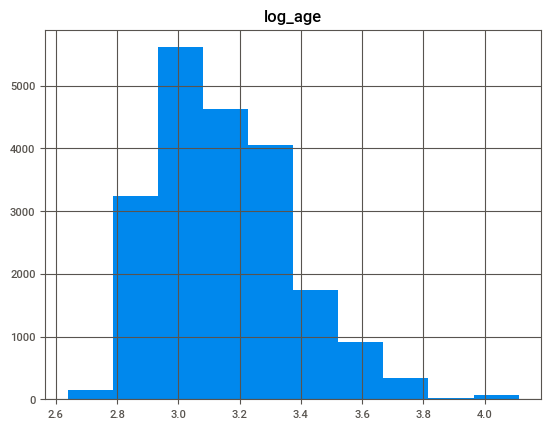

In [13]:
mod_train_data[['log_age']].hist()
plt.show()

In [14]:
#let's drop the age
mod_train_data.drop('Age',axis=1,inplace=True)
mod_train_data.head(5)

,FCVC,NCP,CH2O,FAF,TUE,BMI,Target,Gender_Male,family_history_with_overweight_yes,FAVC_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,log_age
0,2.000000,2.983297,2.763573,0.000000,0.976473,28.259565,6,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.196344
1,2.000000,3.000000,2.000000,1.000000,1.000000,23.422091,1,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.890372
2,1.880534,1.411685,1.910378,0.866045,1.673584,17.126706,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.890372
3,3.000000,3.000000,1.674061,1.467863,0.780199,44.855798,4,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.042269
4,2.679664,1.971472,1.979848,1.967973,0.931721,25.599151,6,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.454456


In [16]:
#cool Let's the dump the data in a separate file for training
mod_train_data.to_csv(cfg.input+"pre_processed.csv")
#Let's dump the encoder
joblib.dump(encoder,cfg.models+'encoder.joblib')


['../models/encoder.joblib']